# Projet 3 - Anticipez les besoins en consommation de bâtiments

## Analyse exploratoire et création d'un dataset clean

Le but de ce notebook est d'analyser le jeu de données initial et de le traiter afin de produire un dataset "clean", exporté en csv, qui sera la base du travail de machine learning consécutif.

In [1]:
import pandas as pd
from MLUtils import DataAnalysis, DataEngineering

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importation du jeu de données
df = pd.read_csv('data/2016_Building_Energy_Benchmarking.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

Le jeu initial de données contient 3376 observations réparties en 46 colonnes/variables.

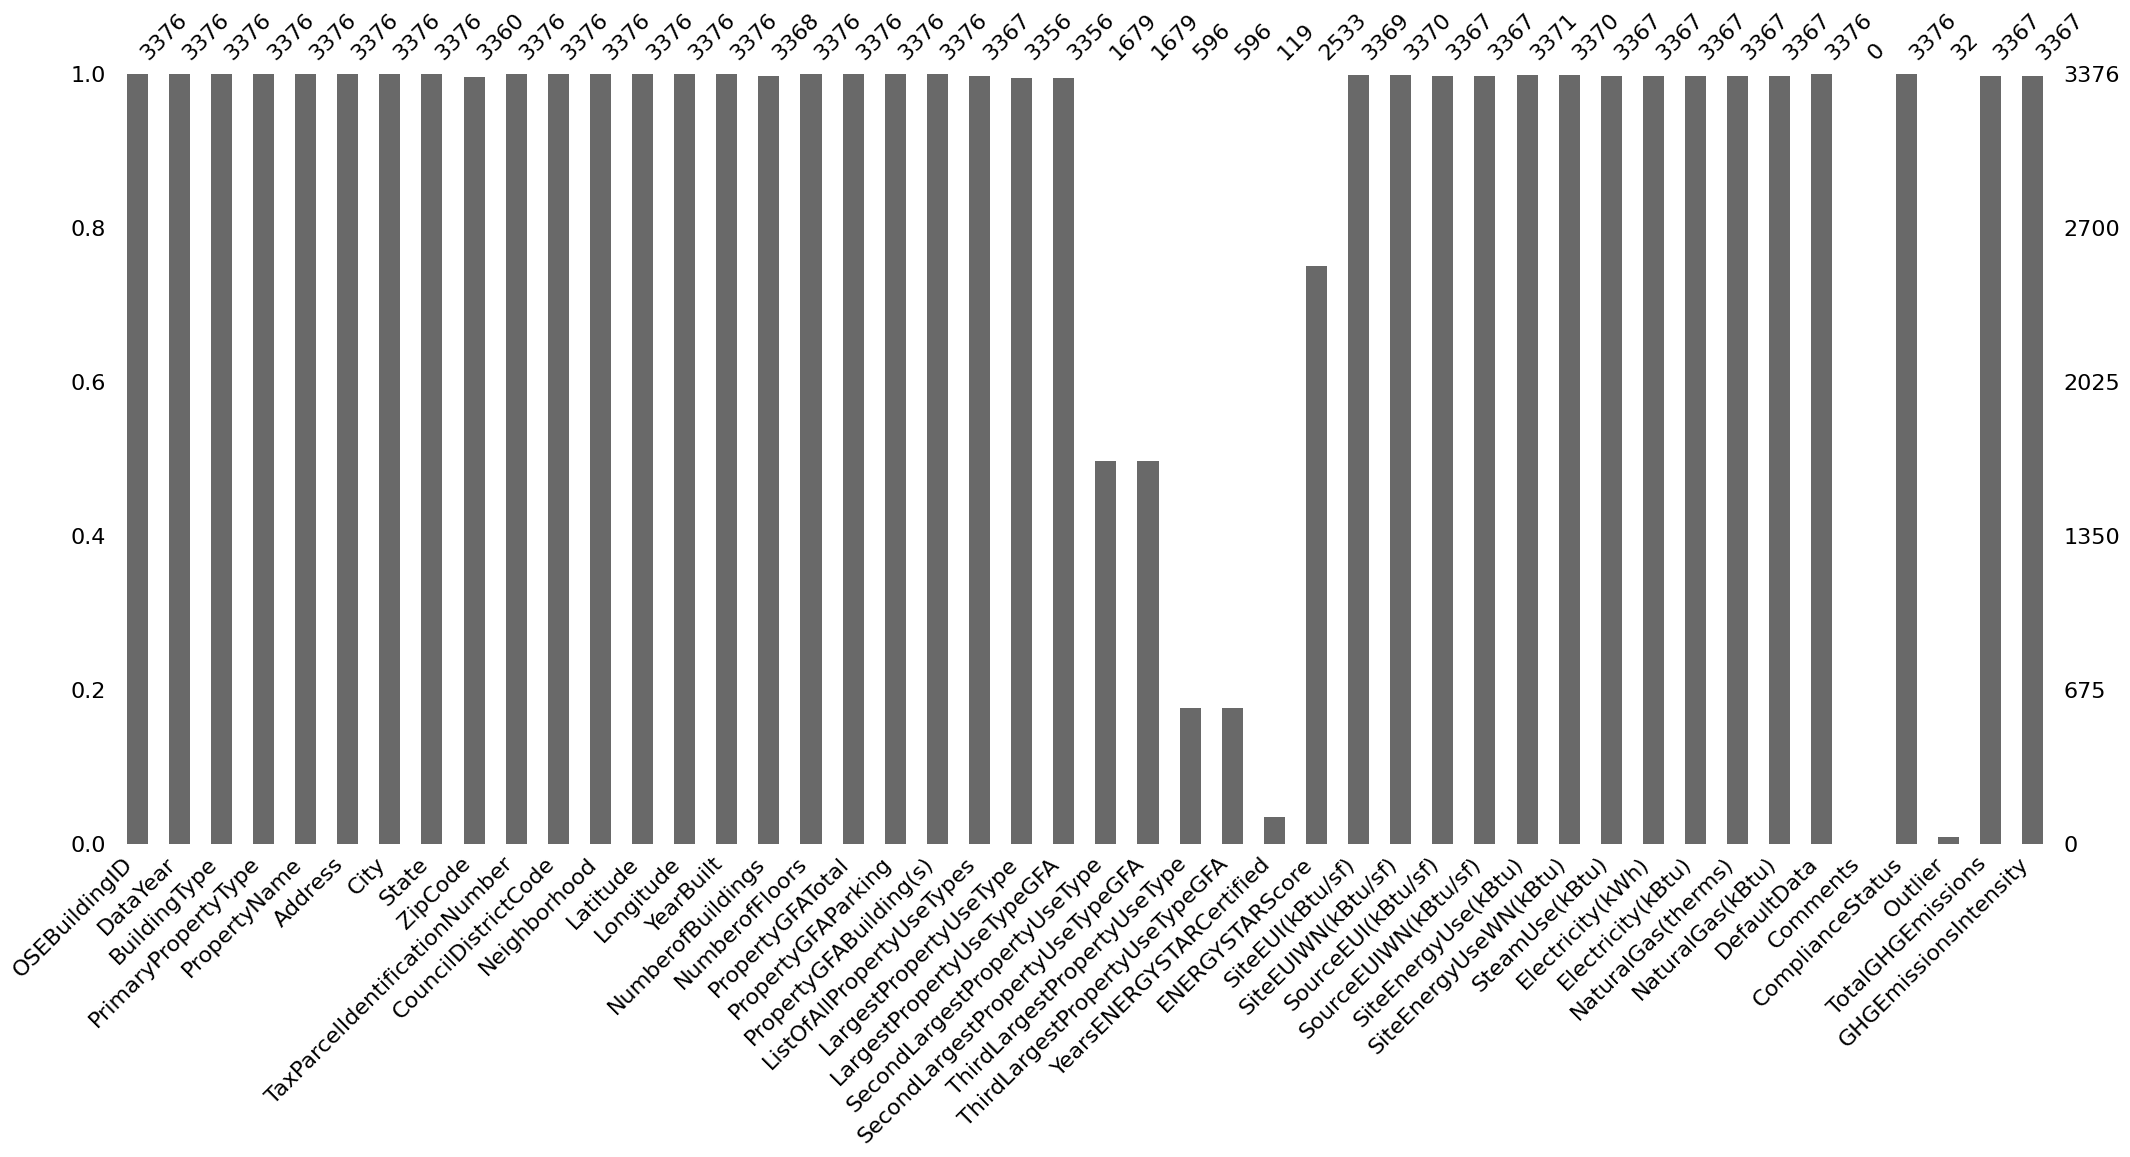

In [4]:
DataAnalysis.show_columns_population(df, type='bar')

On constate que plusieurs colonnes contiennent trop peu de données pour être exploitées. Nous enlevons donc les colonnes qui ont moins de 30% de données.

In [5]:
(df, logs, n_columns_removed) = DataEngineering.remove_columns_by_percentage(df, 0.3)

print("Nombre de colonnes supprimées : ", n_columns_removed)

logs

Nombre de colonnes supprimées :  5


['La colonne ThirdLargestPropertyUseType a été supprimée car elle ne contient que 17.65% de valeurs renseignées.',
 'La colonne ThirdLargestPropertyUseTypeGFA a été supprimée car elle ne contient que 17.65% de valeurs renseignées.',
 'La colonne YearsENERGYSTARCertified a été supprimée car elle ne contient que 3.52% de valeurs renseignées.',
 'La colonne Comments a été supprimée car elle ne contient que 0.0% de valeurs renseignées.',
 'La colonne Outlier a été supprimée car elle ne contient que 0.95% de valeurs renseignées.']

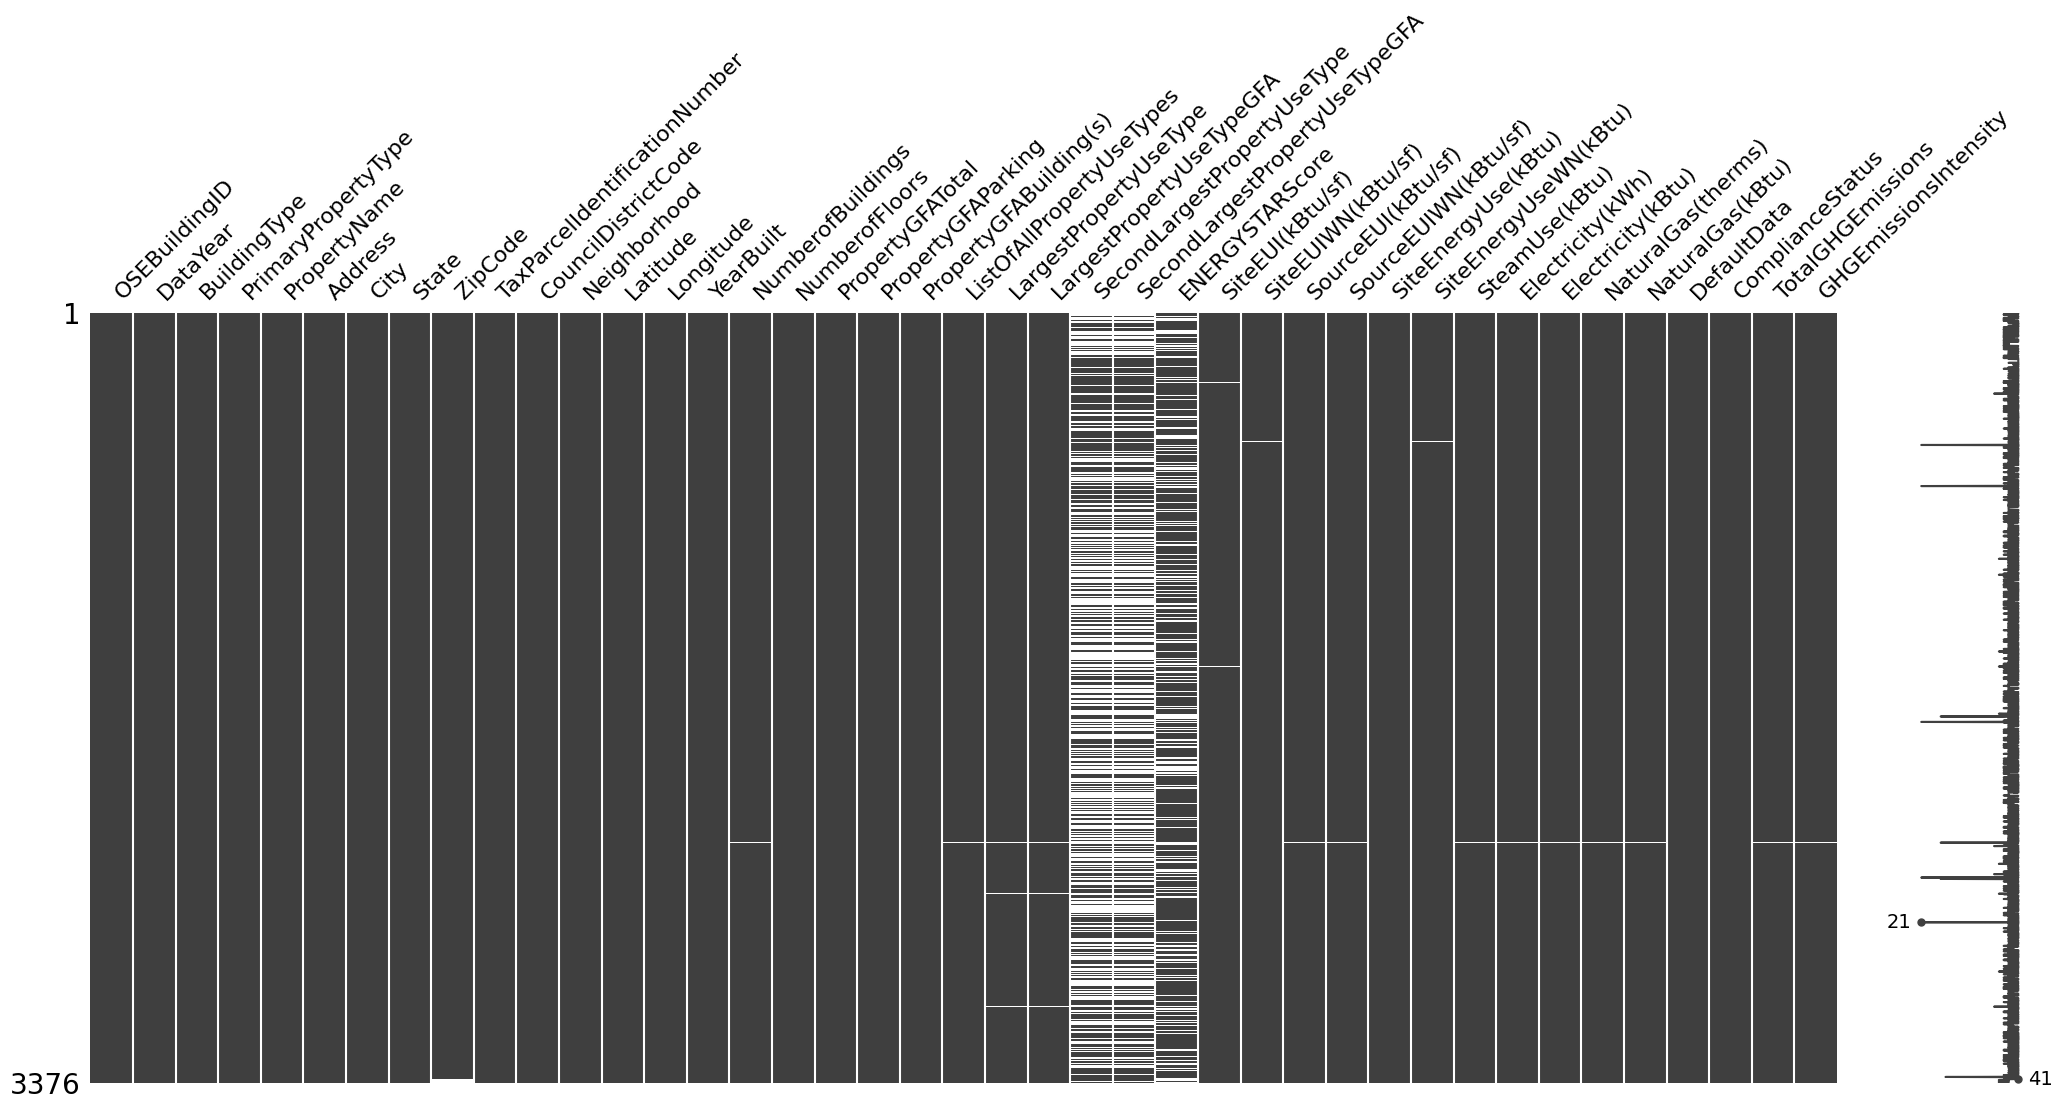

In [6]:
DataAnalysis.show_columns_population(df, type='matrix')

In [7]:
df.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000


Grâce à cette analyse, nous pouvons voir que :
- La colonne DataYear semble contenir toujours la même valeur
- Les colonne OSEBuildingID, PropertyName, Address, City, State, TaxParcelIdentificationNumber, CouncilDistrictCode ne seront pas utile pour nos algorithmes, car bien trop spécifiques

Nous les enlevons donc du dataset.

In [8]:
df = DataEngineering.remove_columns_by_name(df, ['OSEBuildingID', 'DataYear', 'PropertyName', 'Address', 'City', 'State', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode'])

In [9]:
# On liste les colonnes qui ont des valeurs de type number
df.select_dtypes(include=['number']).columns

Index(['ZipCode', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)',
       'NaturalGas(therms)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

## Analyse des colonnes de type number et valeurs aberrantes

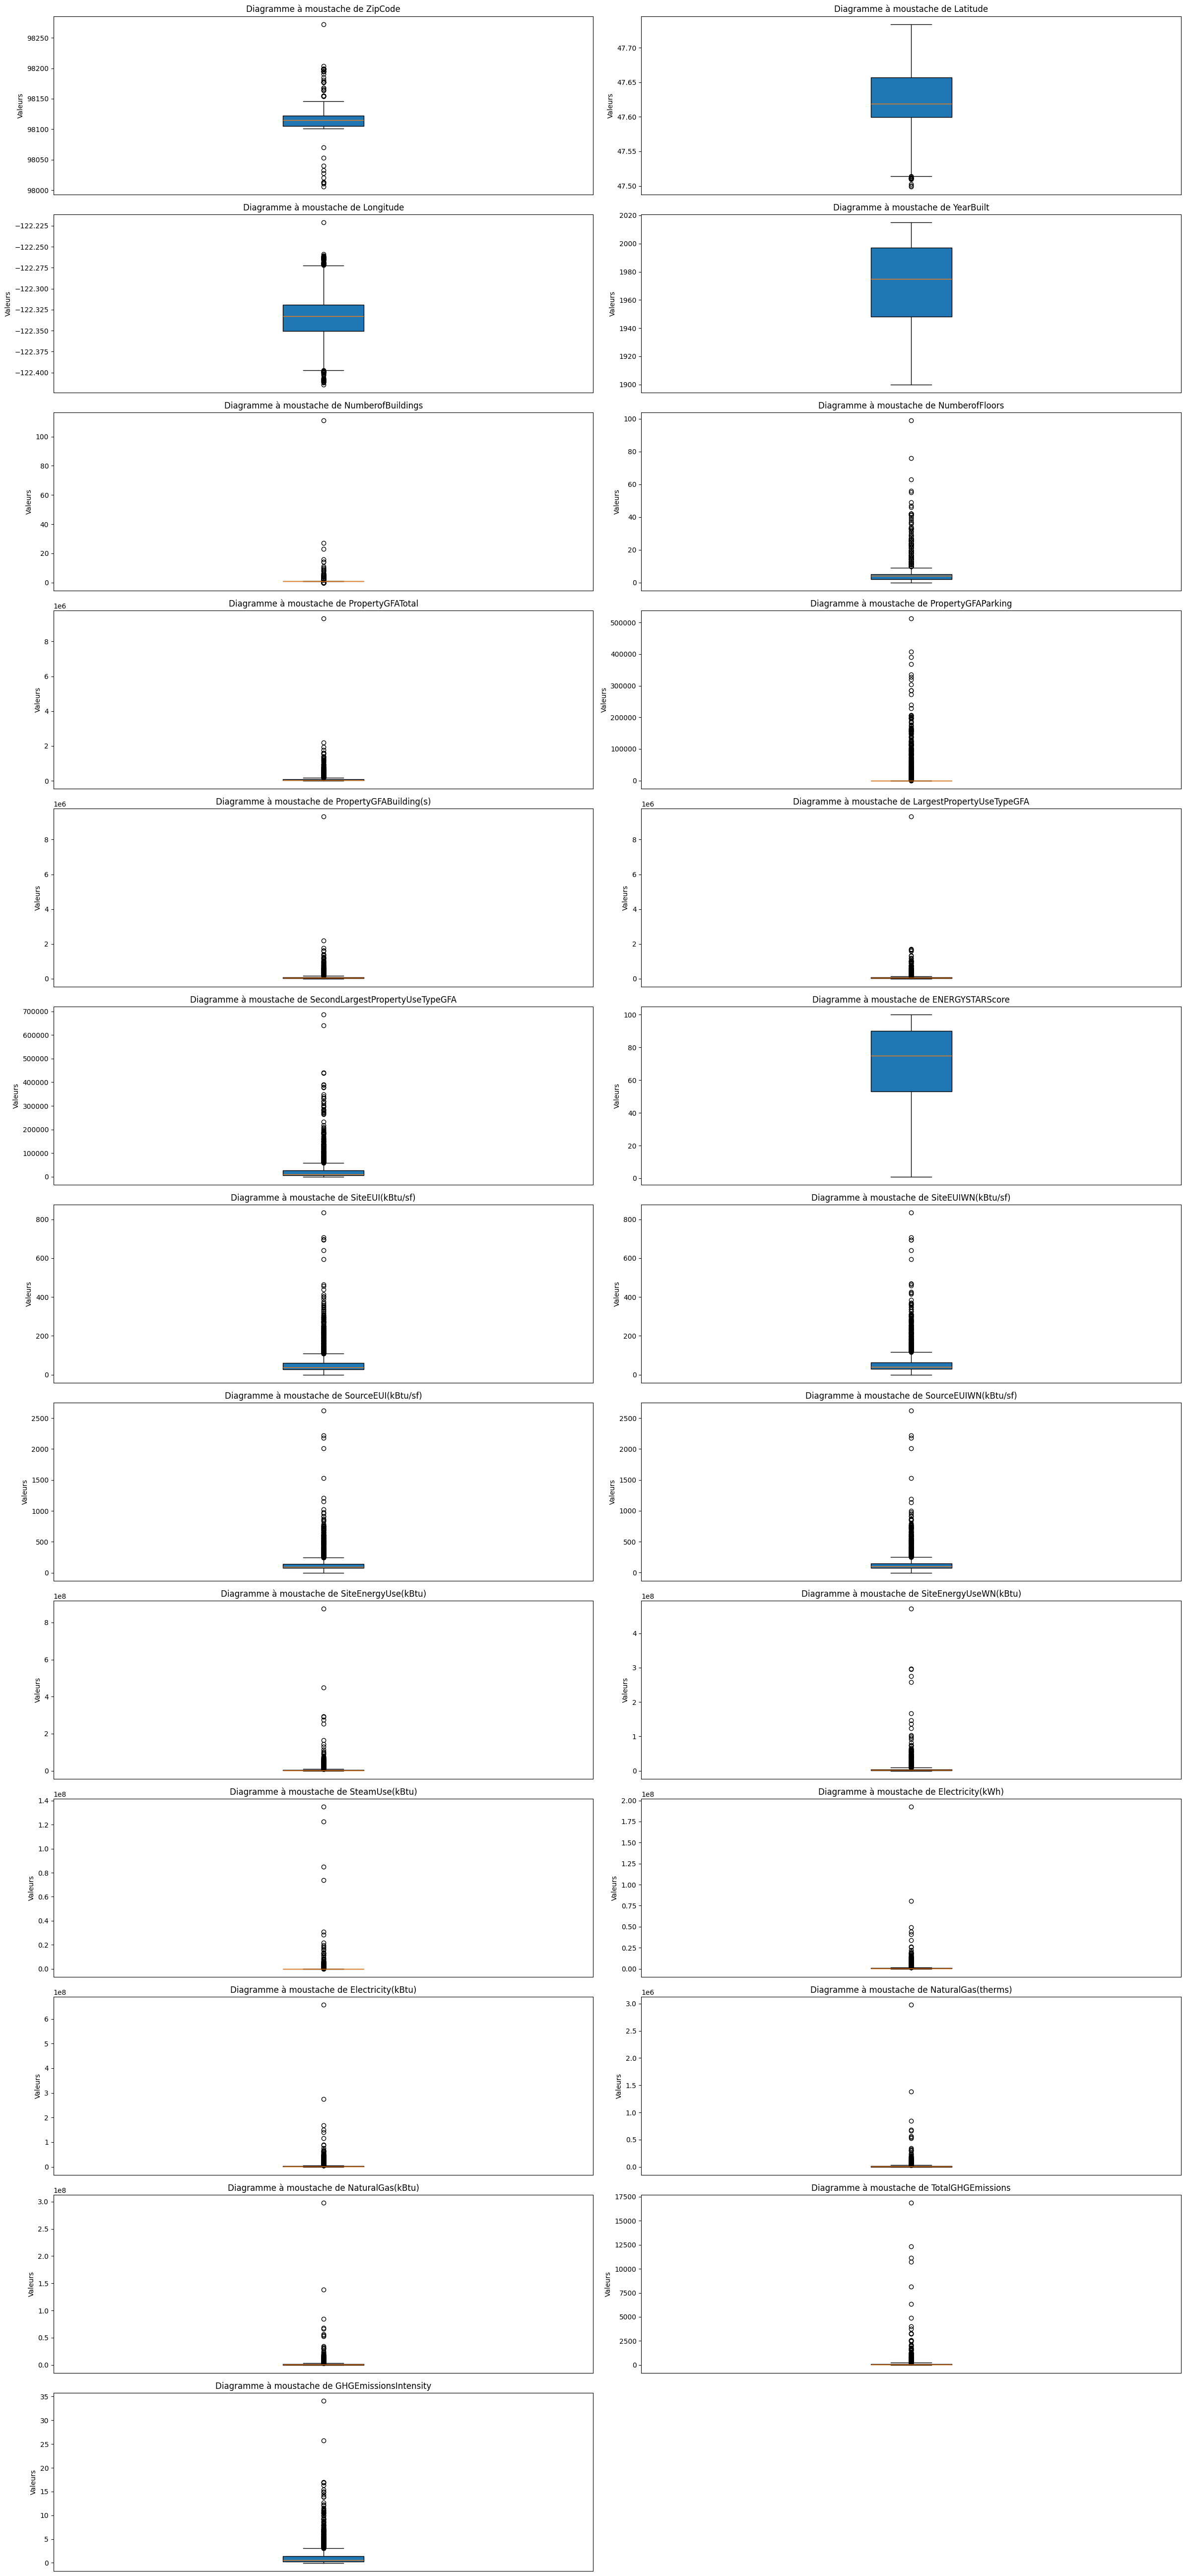

In [10]:
import matplotlib.pyplot as plt
import math

# Données pour le graphique
columns_to_plot = ['ZipCode', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity']
data_to_plot = [df[col].dropna() for col in columns_to_plot]

# Calculer le nombre de lignes nécessaires
num_rows = math.ceil(len(columns_to_plot) / 2)

# Ajuster la taille de la figure
fig, axs = plt.subplots(num_rows, 2, figsize=(12*2, 4*num_rows))
axs = axs.ravel()

for idx, col in enumerate(columns_to_plot):
    axs[idx].boxplot(data_to_plot[idx], vert=True, patch_artist=True)
    axs[idx].set_title(f'Diagramme à moustache de {col}')
    axs[idx].set_ylabel('Valeurs')
    axs[idx].set_xticks([])

# Supprimer les axes non utilisés s'il y en a
for idx in range(len(columns_to_plot), num_rows*2):
    axs[idx].axis('off')

plt.tight_layout()
plt.show()


In [11]:
# Créer un dataframe ne contenant que les colonnes de type number
df_num = df.select_dtypes(include=['number'])

In [12]:
correlation_matrix = df_num.corr()

# write correlation matrix to file
correlation_matrix.to_csv('data/correlation_matrix.csv')

print(correlation_matrix)

                                  ZipCode  Latitude  Longitude  YearBuilt  \
ZipCode                          1.000000  0.030536  -0.120893   0.094818   
Latitude                         0.030536  1.000000   0.005250   0.117239   
Longitude                       -0.120893  0.005250   1.000000  -0.051111   
YearBuilt                        0.094818  0.117239  -0.051111   1.000000   
NumberofBuildings               -0.009582  0.020646   0.017858  -0.023712   
NumberofFloors                  -0.117719 -0.023980  -0.026054   0.146214   
PropertyGFATotal                -0.052669 -0.018162   0.025383   0.100417   
PropertyGFAParking              -0.076657 -0.001167  -0.003374   0.183176   
PropertyGFABuilding(s)          -0.043509 -0.018932   0.027237   0.077203   
LargestPropertyUseTypeGFA       -0.036931 -0.015277   0.029323   0.070187   
SecondLargestPropertyUseTypeGFA -0.059226 -0.052773   0.018545   0.197447   
ENERGYSTARScore                  0.002822  0.079948  -0.026404   0.028813   

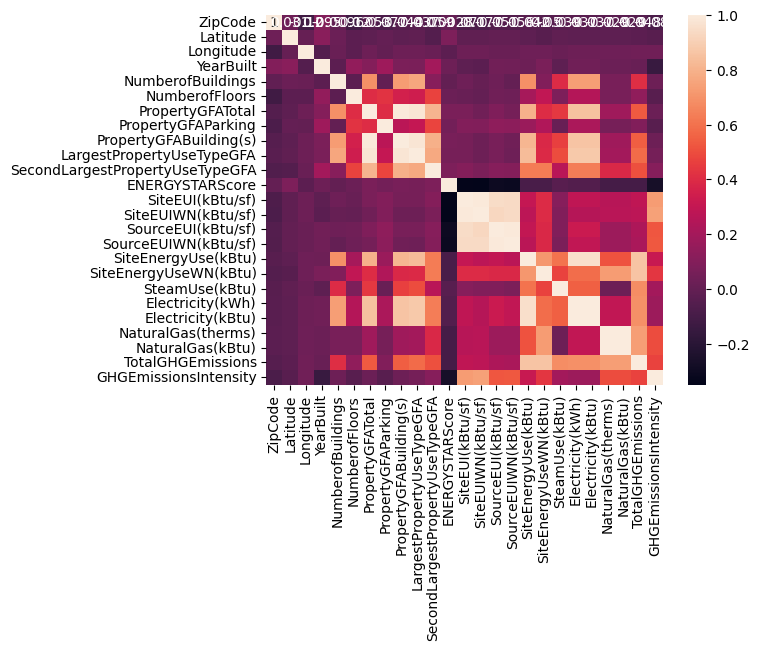

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Analyse des colonnes contenant des valeurs autres que des numbers

In [14]:
# create a dataframe with columns which are not number type
df_not_num = df.select_dtypes(exclude=['number'])

In [15]:
df_not_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   BuildingType                  3376 non-null   object
 1   PrimaryPropertyType           3376 non-null   object
 2   Neighborhood                  3376 non-null   object
 3   ListOfAllPropertyUseTypes     3367 non-null   object
 4   LargestPropertyUseType        3356 non-null   object
 5   SecondLargestPropertyUseType  1679 non-null   object
 6   DefaultData                   3376 non-null   bool  
 7   ComplianceStatus              3376 non-null   object
dtypes: bool(1), object(7)
memory usage: 188.0+ KB


In [16]:
df_not_num.sample(5)

,BuildingType,PrimaryPropertyType,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,DefaultData,ComplianceStatus
2833,NonResidential,K-12 School,EAST,K-12 School,K-12 School,NaN,False,Compliant
1474,NonResidential,Medical Office,NORTHEAST,"Medical Office, Parking",Medical Office,Parking,False,Compliant
668,Multifamily MR (5-9),Mid-Rise Multifamily,DOWNTOWN,Multifamily Housing,Multifamily Housing,NaN,False,Compliant
537,NonResidential,Distribution Center,GREATER DUWAMISH,"Distribution Center, Office, Retail Store",Distribution Center,Office,False,Compliant
1955,Multifamily MR (5-9),Mid-Rise Multifamily,CENTRAL,"Multifamily Housing, Parking, Retail Store",Multifamily Housing,Parking,False,Compliant


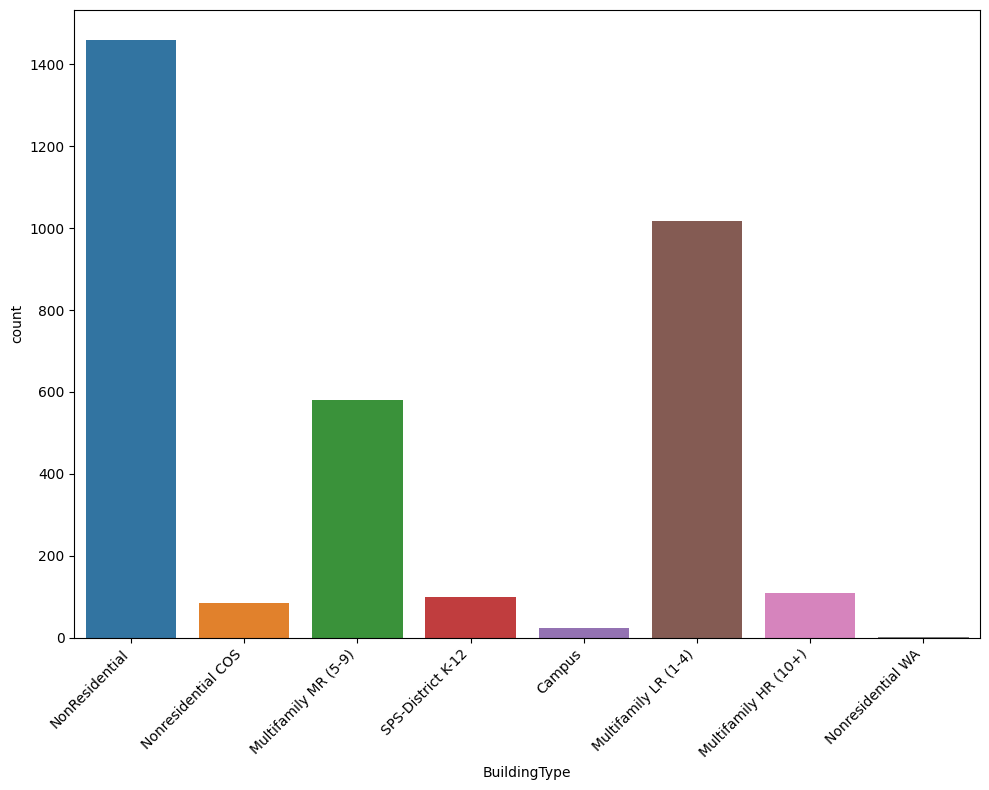

In [17]:
# list values of column 'BuildingType' and show their counts graphically with seaborn
plt.figure(figsize=(10, 8))
count_plot = sns.countplot(x='BuildingType', data=df_not_num)
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()

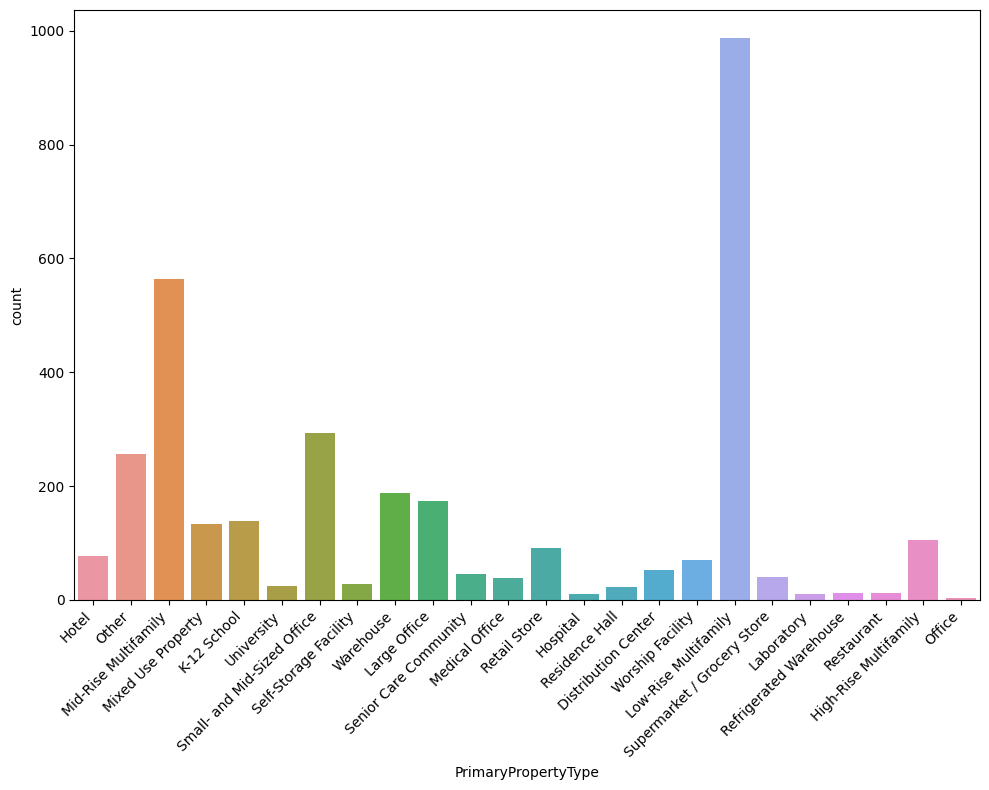

In [18]:
plt.figure(figsize=(10, 8))
count_plot = sns.countplot(x='PrimaryPropertyType', data=df_not_num)
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()

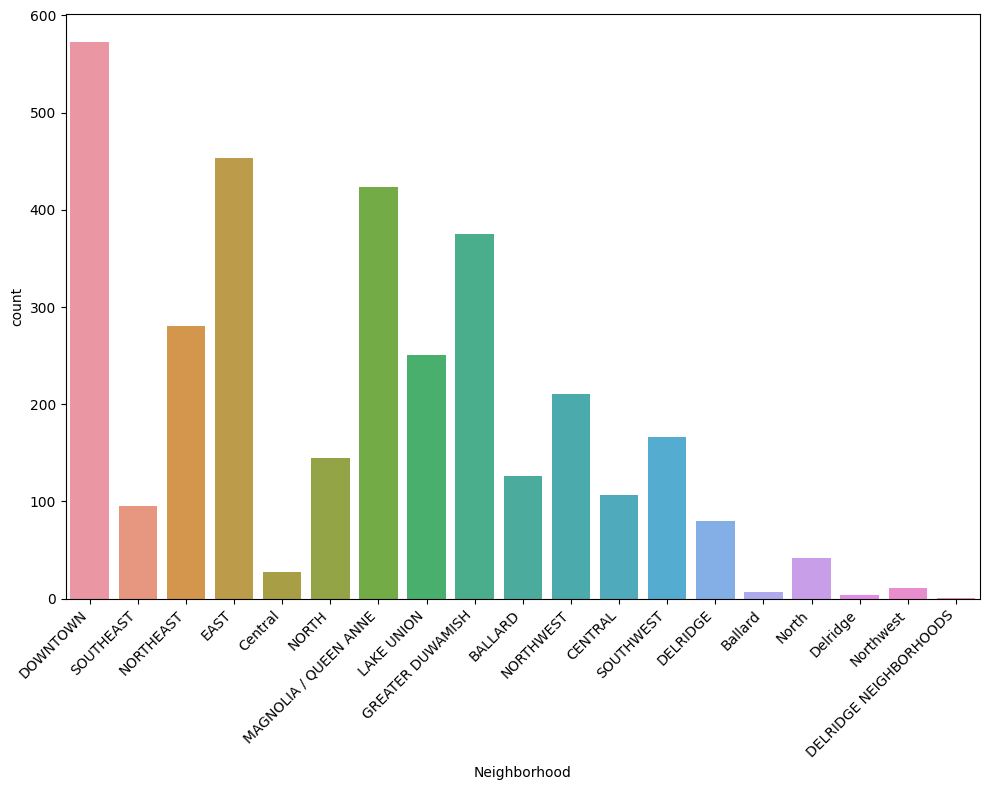

In [19]:
plt.figure(figsize=(10, 8))
count_plot = sns.countplot(x='Neighborhood', data=df_not_num)
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()

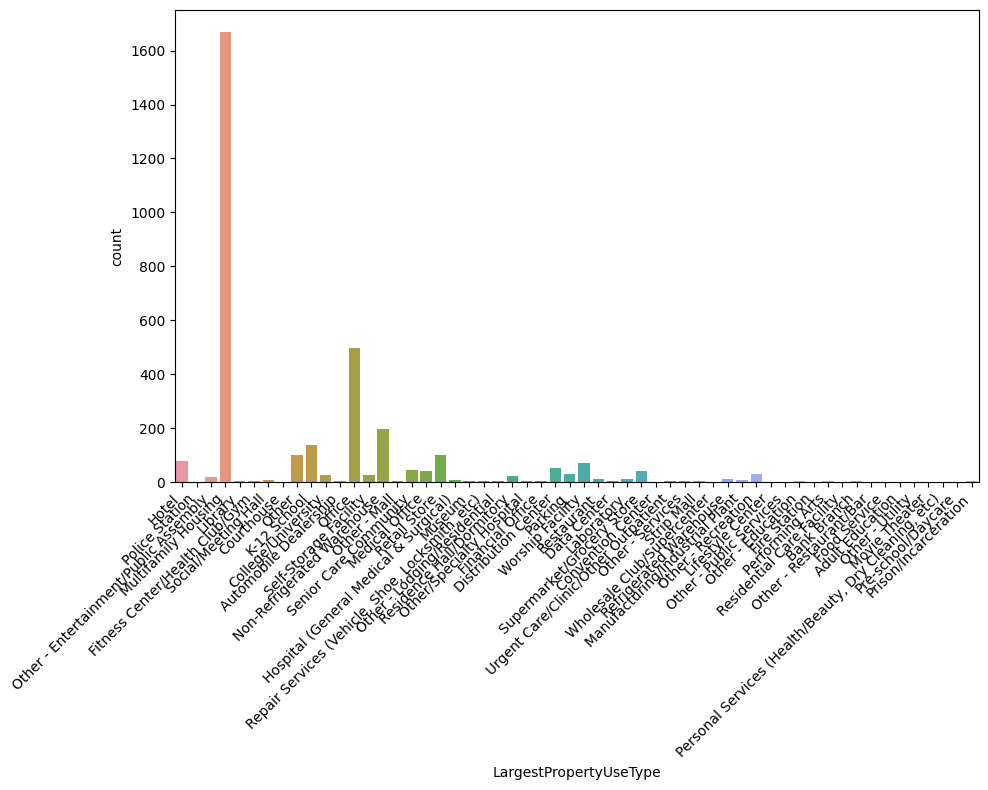

In [20]:
plt.figure(figsize=(10, 8))
count_plot = sns.countplot(x='LargestPropertyUseType', data=df_not_num)
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()

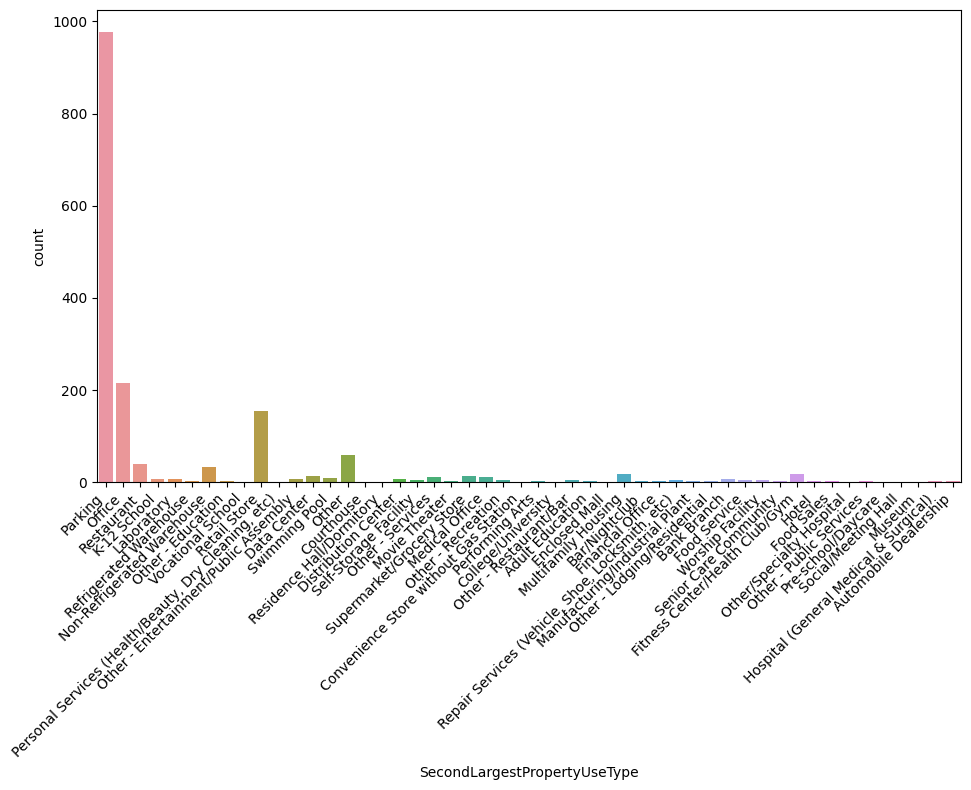

In [21]:
plt.figure(figsize=(10, 8))
count_plot = sns.countplot(x='SecondLargestPropertyUseType', data=df_not_num)
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()

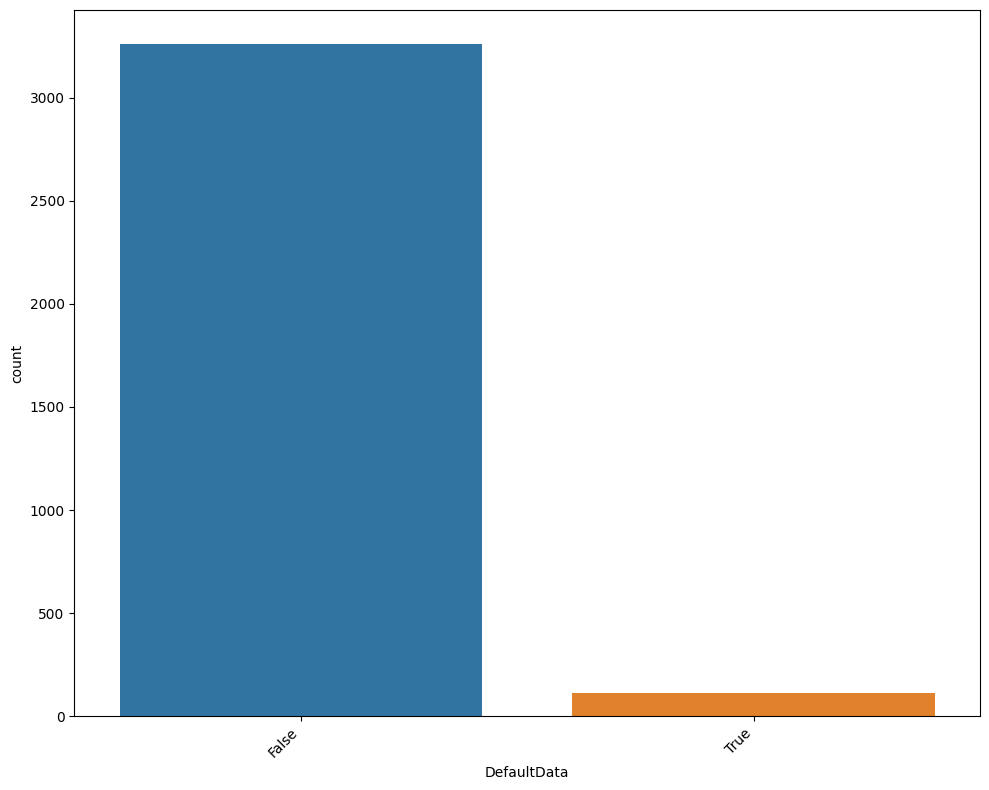

In [22]:
plt.figure(figsize=(10, 8))
count_plot = sns.countplot(x='DefaultData', data=df_not_num)
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()

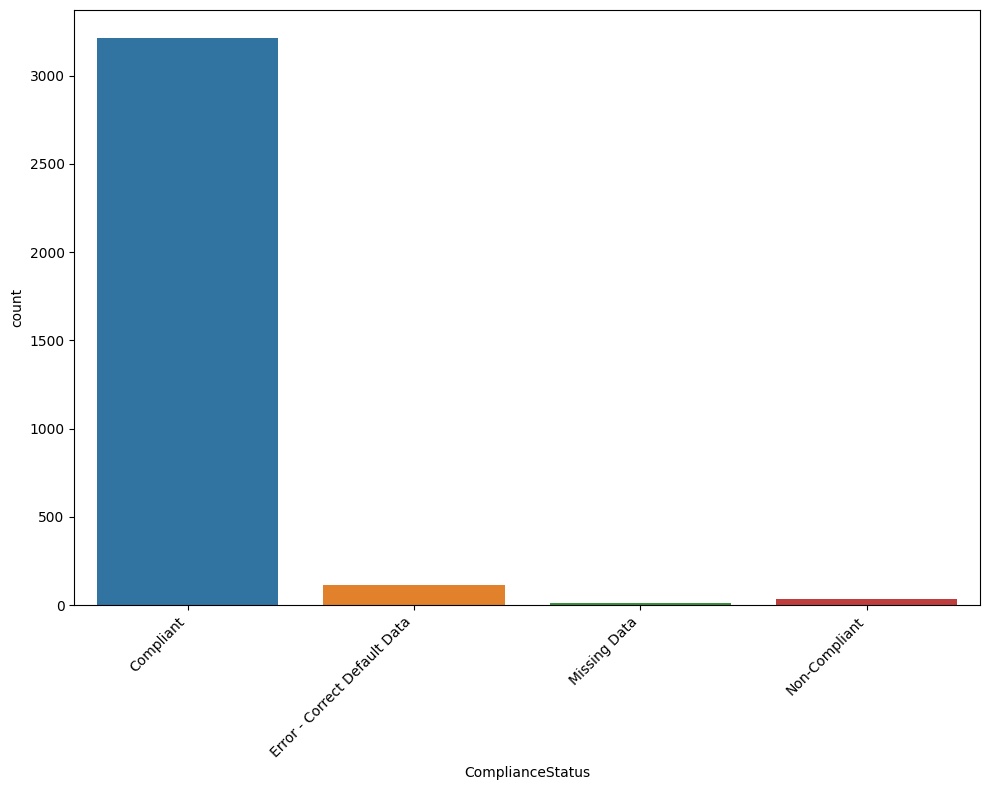

In [23]:
plt.figure(figsize=(10, 8))
count_plot = sns.countplot(x='ComplianceStatus', data=df_not_num)
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()

In [24]:
# write the resulting dataframe to a csv file
df.to_csv('data/clean.csv', index=False)